In [10]:
# Import necessary libraries
import mne
import numpy as np
import pandas as pd

In [11]:
# create file path to edf file
edf_file_path = 'Data\EDF\jjones shop_EPOCX_198673_2023.10.24T08.34.50.08.00.edf'

In [12]:
# read the edf data
edf_data = mne.io.read_raw_edf(edf_file_path)
# edf_data = mne.io.read_raw_edf(edf_file_path, preload=True)

Extracting EDF parameters from c:\Users\Jason\OneDrive\Documents\GitHub\Cs4610-Data-Science-Capstone-Fall23\Data\EDF\jjones shop_EPOCX_198673_2023.10.24T08.34.50.08.00.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [13]:
# basic information about the data
print(edf_data.info)

<Info | 8 non-empty values
 bads: []
 ch_names: TIME_STAMP_s, TIME_STAMP_ms, OR_TIME_STAMP_s, OR_TIME_STAMP_ms, ...
 chs: 60 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: 2023-10-24 08:34:50 UTC
 nchan: 60
 projs: []
 sfreq: 128.0 Hz
 subject_info: 1 item (dict)
>


In [14]:
# bandpass filter the data between 1 and 50 Hz using firwin design filter
edf_data.filter(1, 50, fir_design='firwin')

RuntimeError: By default, MNE does not load data into main memory to conserve resources. inst.filter requires raw data to be loaded. Use preload=True (or string) in the constructor or raw.load_data().

In [15]:
# band-pass filter the data between 1 and 40 Hz 
raw_data.filter(l_freq=1.0, h_freq=40.0)
print("Band-pass filter applied.")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Band-pass filter applied.


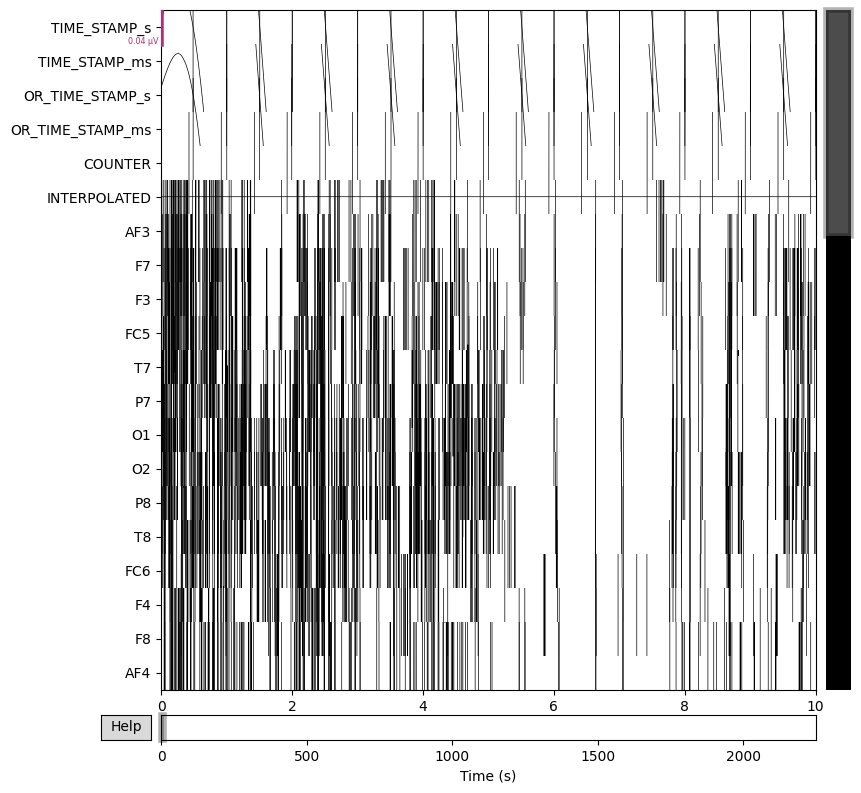

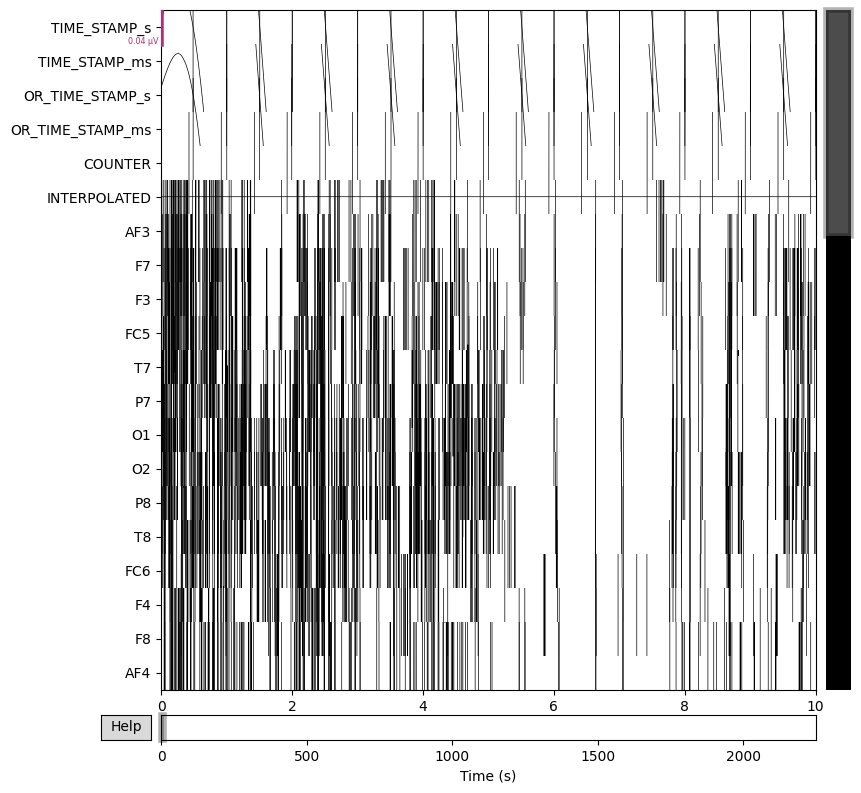

In [16]:
# visualizing the data using matplotlib 
%matplotlib inline
raw_data.plot(scalings='auto')

In [17]:
# artifact removal using ICA
# number of components for ICA
n_components = 25  # This is an example; adjust based on your data

# initialize and fit ICA
ica = mne.preprocessing.ICA(n_components=n_components, random_state=97, max_iter=800)
ica.fit(raw_data)

# plot ICA components (optional, for visual inspection)
ica.plot_components()

# once you identify which components represent artifacts, you can exclude them
ica.exclude = [0, 1]  # Example: assuming components 0 and 1 are artifacts

# apply the ICA to the raw data, removing the artifacts
raw_data_clean = ica.apply(raw_data.copy())

Fitting ICA to data using 60 channels (please be patient, this may take a while)
Selecting by number: 25 components
Fitting ICA took 7.0s.


C:\Users\Jason\AppData\Local\Temp\ipykernel_49960\486477609.py:7: RuntimeWarning: Using n_components=25 (resulting in n_components_=25) may lead to an unstable mixing matrix estimation because the ratio between the largest (53) and smallest (1.6e-06) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 19
  ica.fit(raw_data)


RuntimeError: No digitization points found.